In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
len(df)

11162

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
###Different categories

In [8]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [9]:
df.isnull().values.any()

False

Hence there are no missing values in the dataset.

# Exploratory data analysis

## Exploring categorical features

In [10]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

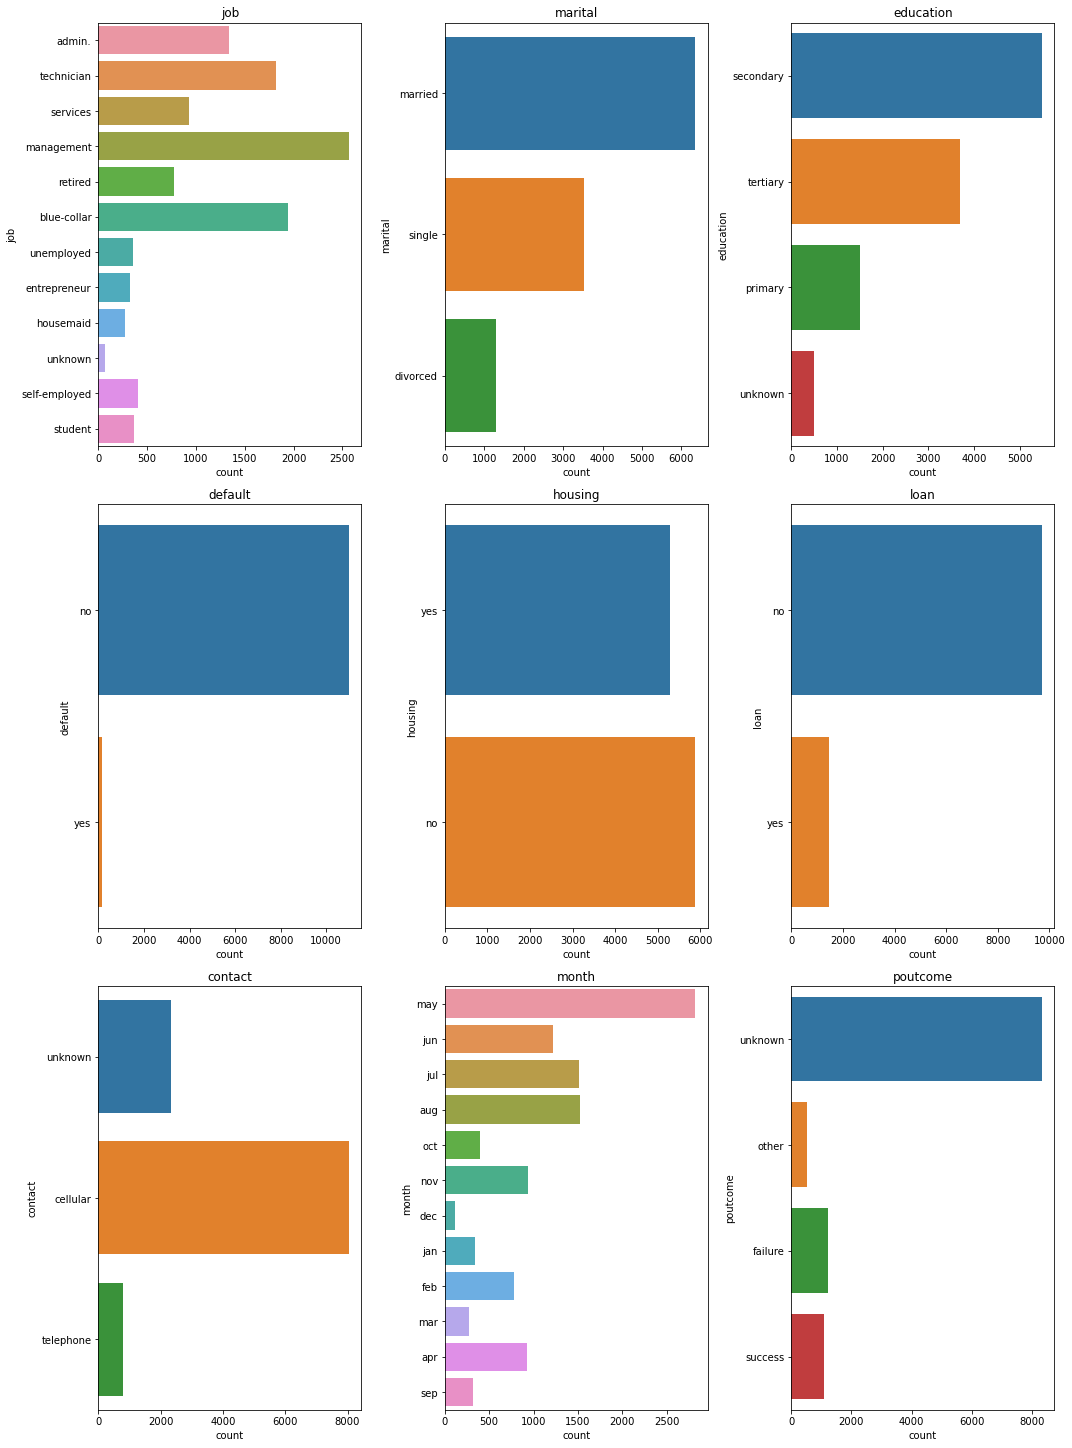

In [11]:
plt.figure(figsize=(15,80))
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y = categorical_feature,data = df)
    plt.title(categorical_feature)
    plotnumber+=1
plt.tight_layout()
plt.show()

## From the above plots we can conclude that:

- In the dataset most of the clients have management as their job type.
- Clients who are married  have more number of records in the given dataset.
- Most of the clients have secondary education.
- Default does not seems to be an important feature so it can be dropped.

## Relationship between categorical features and labels

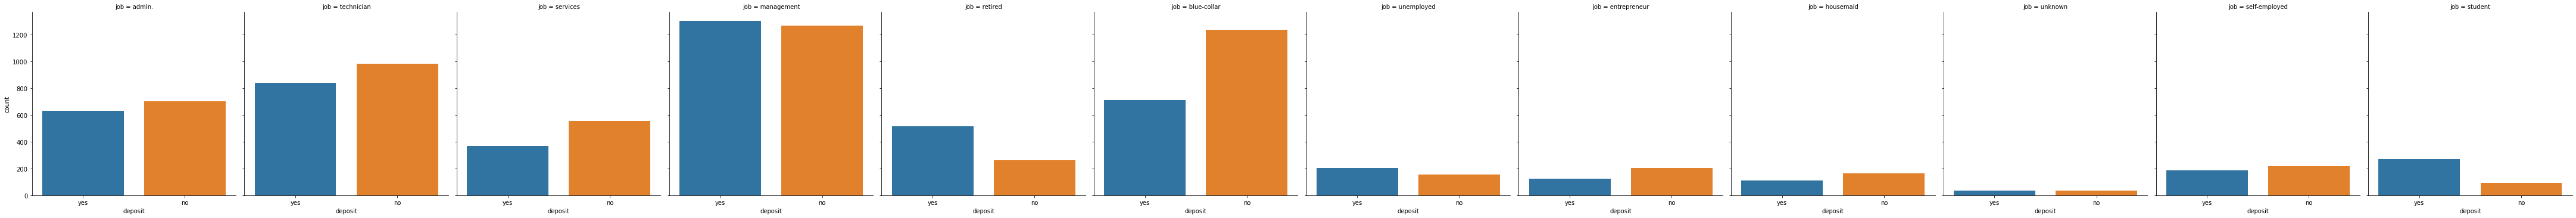

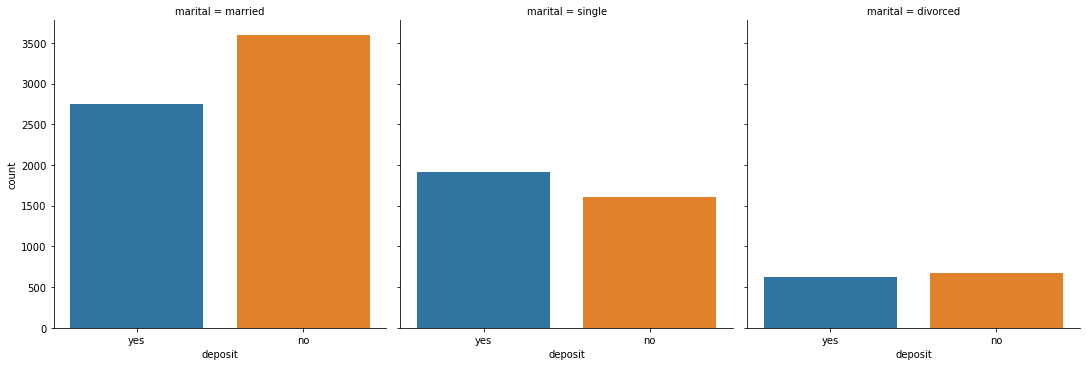

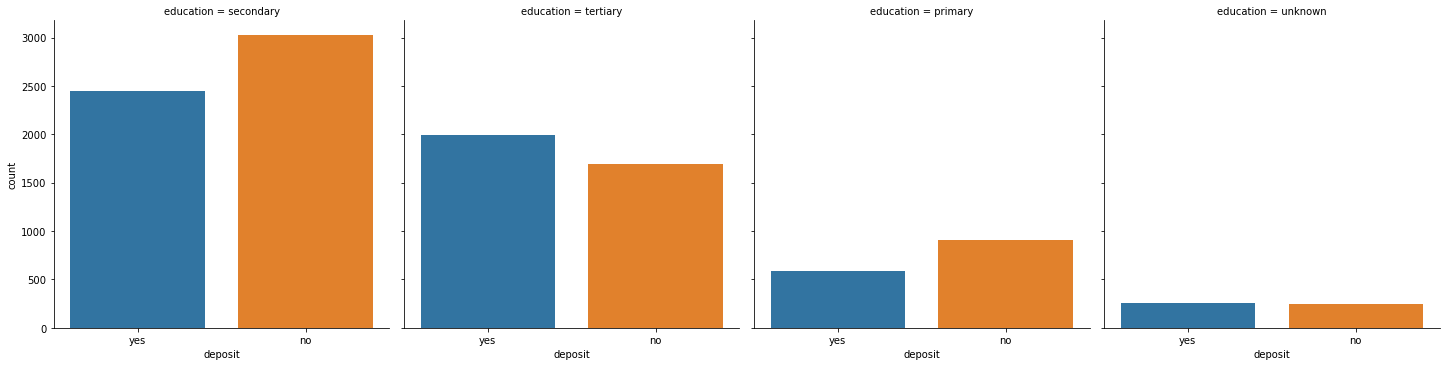

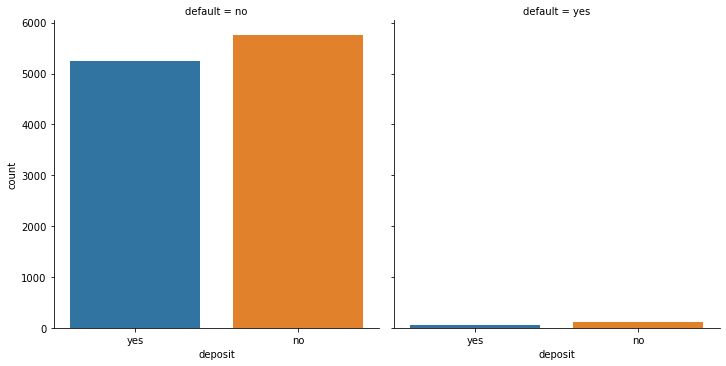

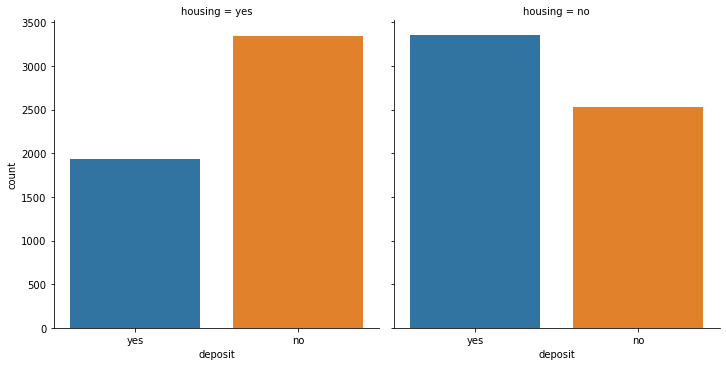

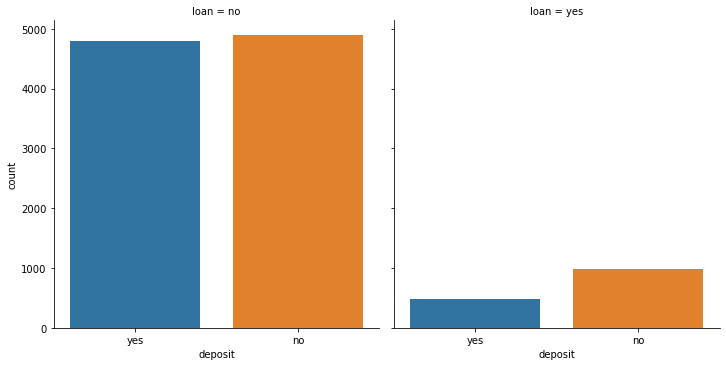

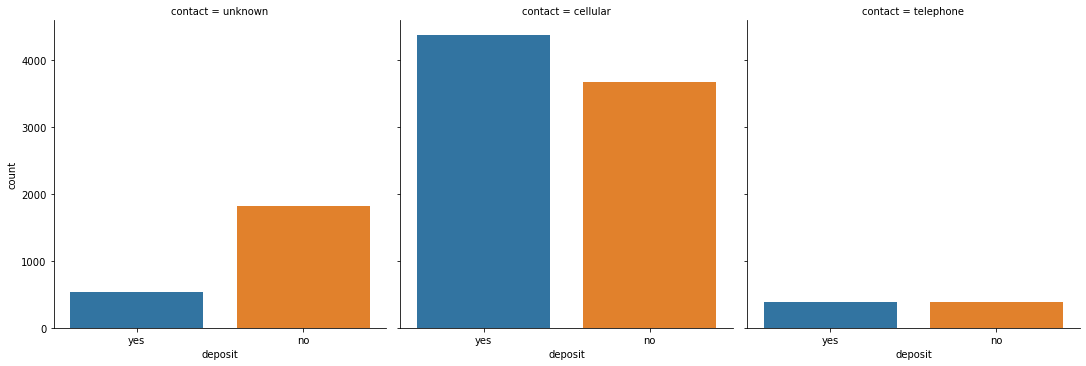

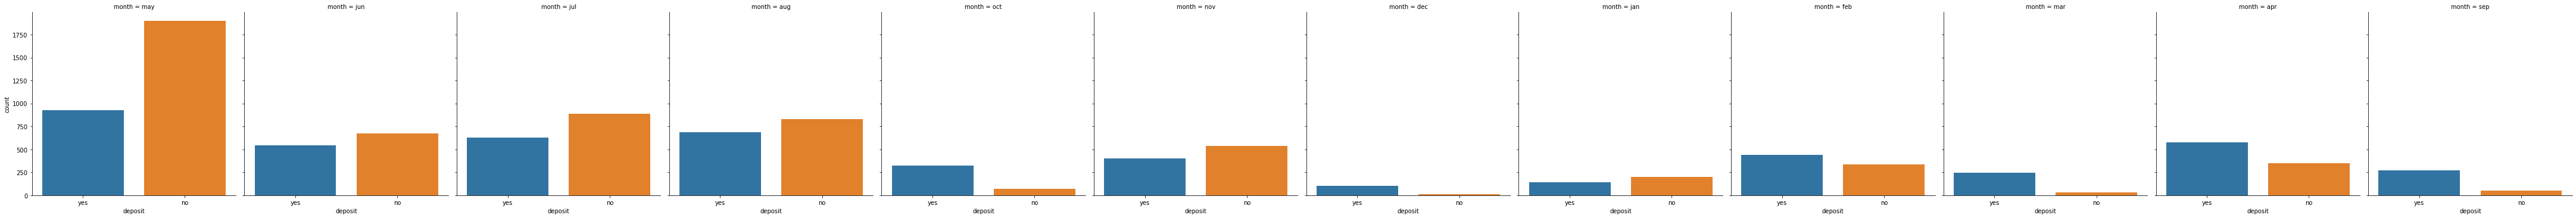

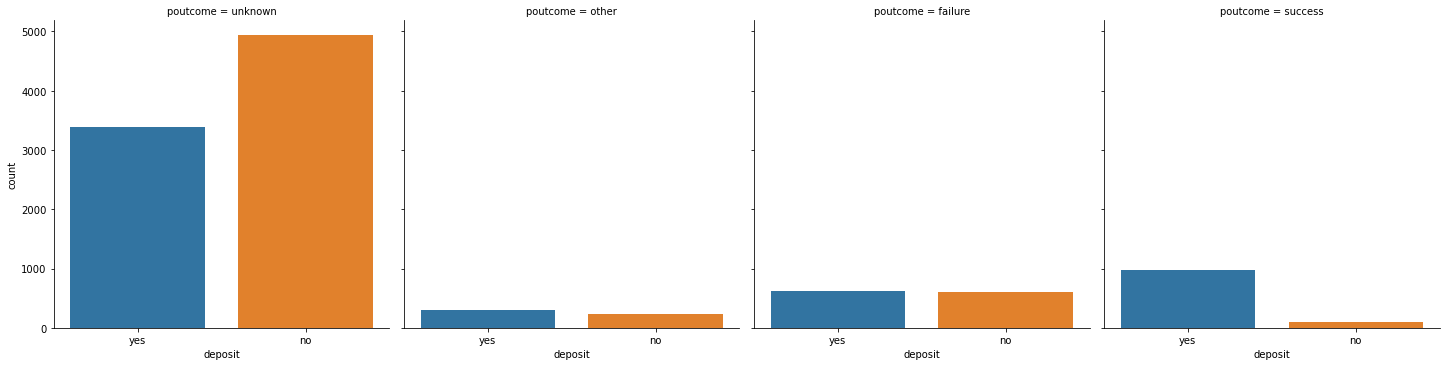

In [11]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)
plt.show()

## Exploring numerical features.

In [12]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes=='int64') & (feature not in ['deposit']))]
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

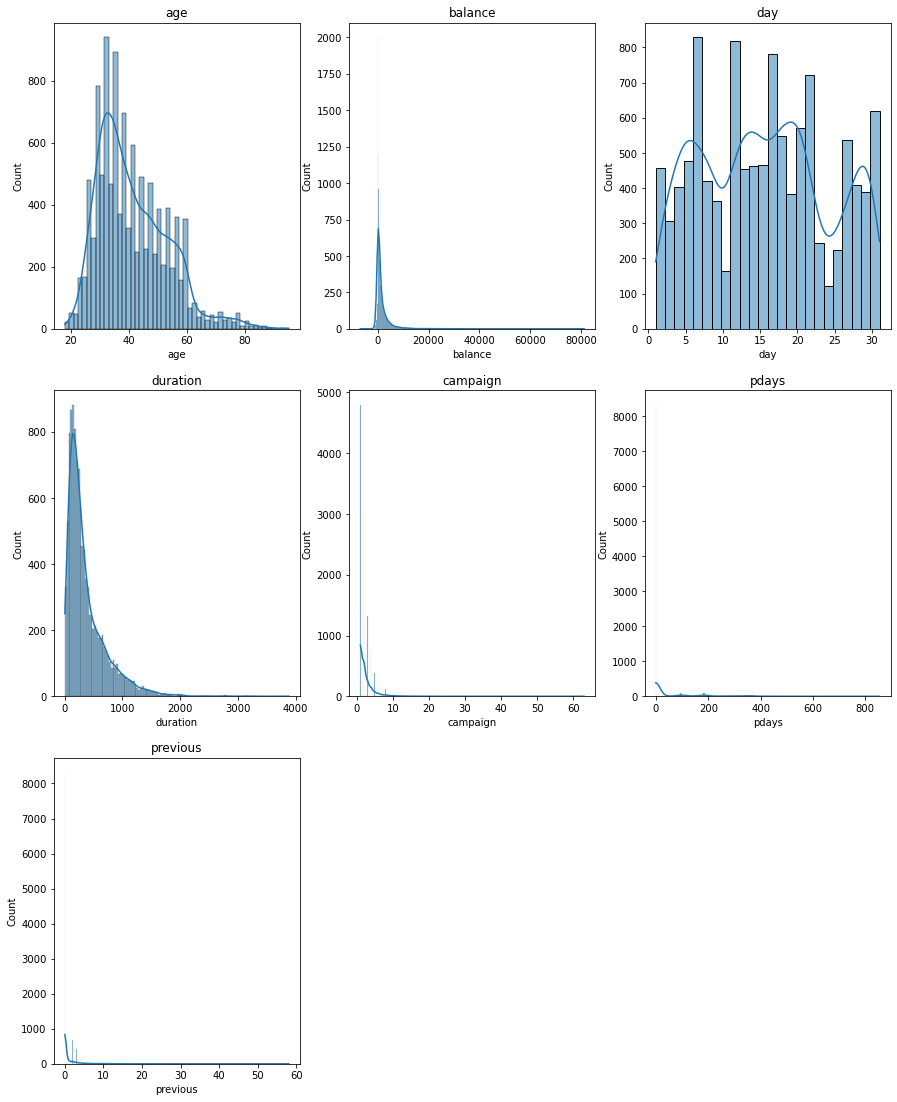

In [13]:
plt.figure(figsize=(15,80))
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(x = numerical_feature,data = df,kde=True)
    plt.title(numerical_feature)
    plotnumber+=1
plt.show()

## From the above plots we can conclude that:

- Features like age and day are distributed normally.
- Features like balance,duration,campaign,pdays and previous are highly skewed towards left and seems to have some outliers. 

## Finding Outliers in numerical features

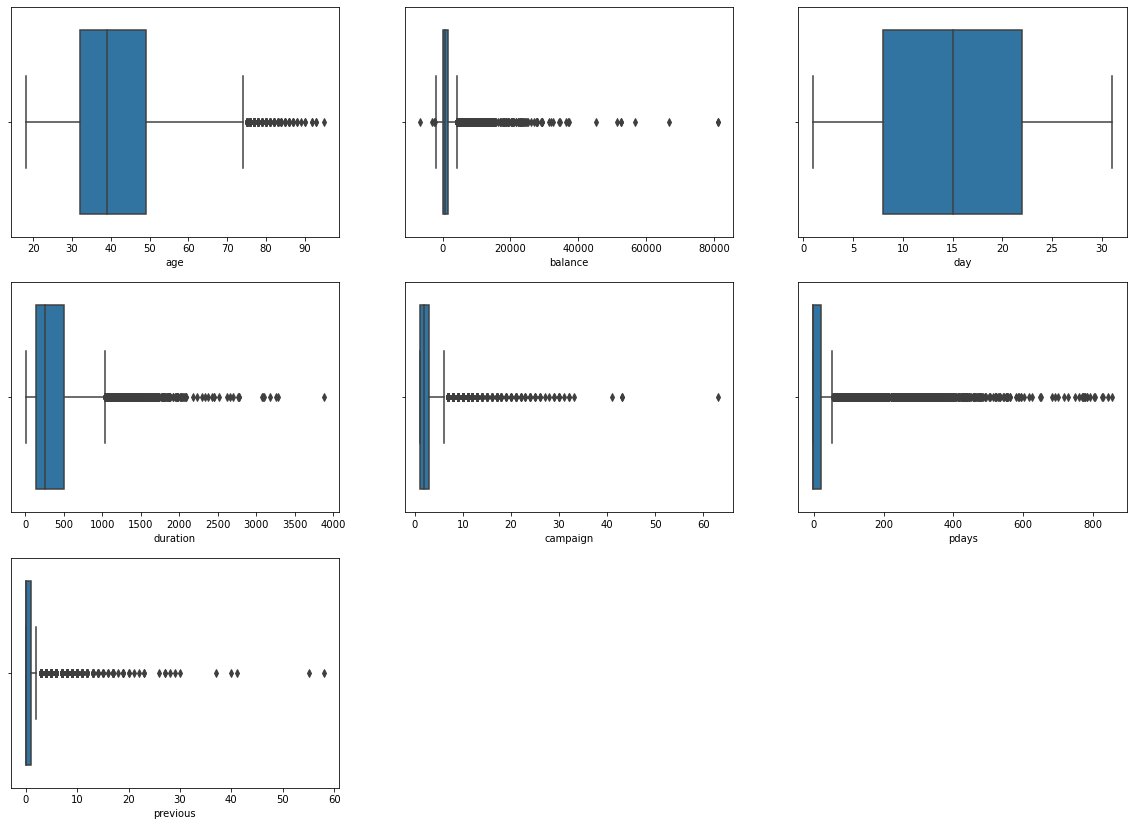

In [14]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x = df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

It can be seen that age,balance,duration,pdays,previous have some outliers.

## Correlation between numerical features

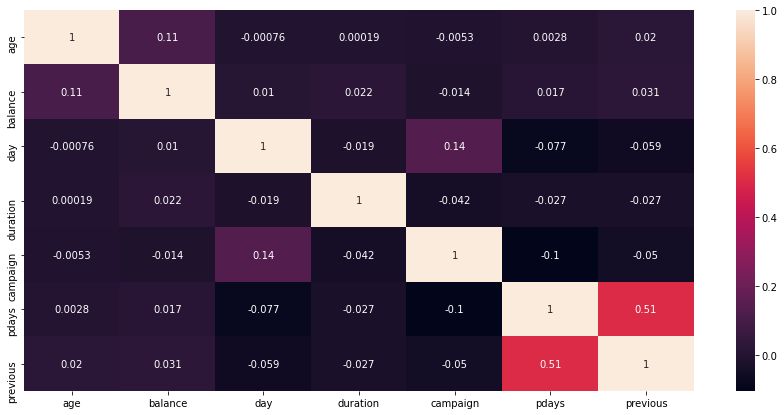

In [15]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

It can be seen that no feature is heavily correlated with any other feature.

### Checking if the dataset is balaced or not.

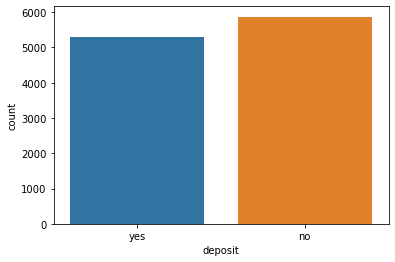

In [7]:
sns.countplot(x='deposit',data=df)
plt.show()

In [17]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

It is clear that the dataset is balanced

# Feature engineering 

## Feature selection

In [18]:
for feature in categorical_features:
    print(feature)
    print()
    print(df[feature].value_counts())
    print()

job

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

marital

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

education

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

default

no     10994
yes      168
Name: default, dtype: int64

housing

no     5881
yes    5281
Name: housing, dtype: int64

loan

no     9702
yes    1460
Name: loan, dtype: int64

contact

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

month

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

poutcome

unknown    8326
failure    1228
success  

Here it can be observed that feature 'default' is highly imbalanced hence it can be dropped.

In [19]:
for feature in numerical_features:
    print(feature)
    print()
    print(df[feature].value_counts())
    print()

age

31    496
32    477
34    466
33    464
35    461
     ... 
88      2
92      2
90      2
89      1
95      1
Name: age, Length: 76, dtype: int64

balance

 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
-187       1
 4279      1
 4464      1
 6513      1
 1357      1
Name: balance, Length: 3805, dtype: int64

day

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
1     122
24    122
Name: day, dtype: int64

duration

97      39
161     38
119     37
158     37
150     37
        ..
1460     1
1452     1
1420     1
1404     1
2015     1
Name: duration, Length: 1428, dtype: int64

campaign

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13     

Here features 'pdays' and 'previous' are highly imbalanced hence they can be dropped

In [43]:
df2 = df.copy()
df2 = df2.drop(['default','pdays'],axis=1)


In [44]:
filtered_cat_var = [feature for feature in df2.columns if ((df2[feature].dtypes=='O') & (feature not in ['deposit']))]

## Handling outliers

In [45]:
#Keeping only those values in 'campaign'  which are less than 33. 
df2 = df2[df2['campaign'] < 33]

#Keeping only those values in 'previous'  which are less than 31. 
df2 = df2[df2['previous'] < 31]
print(df2.shape)

(11152, 15)


## Handling categorical features

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in filtered_cat_var:
    print(feature)
    df2[feature] = le.fit_transform(df2[feature])
    integer_mapping = {l: i for i, l in enumerate(le.classes_)}
    print(integer_mapping)
    print()
    
#df2.head()

job
{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}

marital
{'divorced': 0, 'married': 1, 'single': 2}

education
{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}

housing
{'no': 0, 'yes': 1}

loan
{'no': 0, 'yes': 1}

contact
{'cellular': 0, 'telephone': 1, 'unknown': 2}

month
{'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}

poutcome
{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}



In [47]:
df2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,0,3,yes
1,56,0,1,1,45,0,0,2,5,8,1467,1,0,3,yes
2,41,9,1,1,1270,1,0,2,5,8,1389,1,0,3,yes
3,55,7,1,1,2476,1,0,2,5,8,579,1,0,3,yes
4,54,0,1,2,184,0,0,2,5,8,673,2,0,3,yes


In [48]:
labels = df2['deposit']
df2 = df2.drop(['deposit'],axis = 1)

In [49]:
labels = le.fit_transform(labels)
labels

array([1, 1, 1, ..., 0, 0, 0])

In [122]:
le.classes_

array(['no', 'yes'], dtype=object)

### Split dataset into training and test set

In [50]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(df2,labels,test_size=0.2, random_state=0)

print(len(X_train))
print(len(x_test))

8921
2231


In [68]:
type(X_train)

pandas.core.frame.DataFrame

## Model Building

In [51]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score

### Random forest classifier

In [69]:
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=Y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85210084 0.83800448 0.83632287 0.84136771 0.85426009]
0.8444111994573614


In [80]:
X = X_train.values
x = x_test.values

Results on training data:

Accuracy = 1.0
Precision = 1.0
Recall = 1.0

Results on testing data:

Accuracy = 0.8511878081577767
Precision = 0.8532954353062449
Recall = 0.8511878081577767


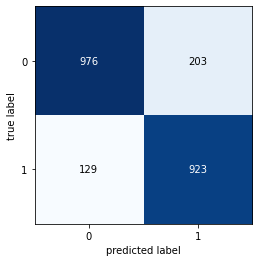

In [94]:
rfc = RandomForestClassifier()
rfc.fit(X,Y_train)
pred_tr_1 = rfc.predict(X)
pred_1 = rfc.predict(x)
conf_matrix = confusion_matrix(y_test,pred_1)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,pred_1,average='weighted')
recall = recall_score(y_test, pred_1,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(Y_train, pred_tr_1)))
print("Precision = "+str(precision_score(Y_train,pred_tr_1,average='weighted')))
print("Recall = "+str(recall_score(Y_train,pred_tr_1,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, pred_1)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))
        

### SVM classifier

In [95]:
model_score =cross_val_score(estimator=svm.SVC(),X=X_train, y=Y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.71316527 0.7264574  0.71132287 0.72309417 0.72926009]
0.7206599590508849


Results on training data:

Accuracy = 0.7240219706310952
Precision = 0.7309485359201019
Recall = 0.7240219706310952

Results on testing data:

Accuracy = 0.7194083370685791
Precision = 0.7276571833709677
Recall = 0.7194083370685791


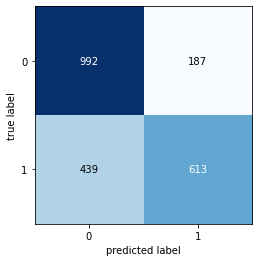

In [96]:
SVM = svm.SVC()
SVM.fit(X,Y_train)
pred_2 = SVM.predict(x)
pred_tr_2 = SVM.predict(X)
conf_matrix = confusion_matrix(y_test,pred_2)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,pred_2,average='weighted')
recall = recall_score(y_test, pred_2,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(Y_train, pred_tr_2)))
print("Precision = "+str(precision_score(Y_train,pred_tr_2,average='weighted')))
print("Recall = "+str(recall_score(Y_train,pred_tr_2,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, pred_2)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))


### XGBoost Classifier

In [56]:
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=Y_train, cv=5)
warnings.filterwarnings('ignore')
print(model_score)
print(model_score.mean())

[18:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:00:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results on training data:

Accuracy = 0.9609909203004148
Precision = 0.9612471146050818
Recall = 0.9609909203004148

Results on testing data:

Accuracy = 0.8502913491707754
Precision = 0.8513068489185586
Recall = 0.8502913491707754


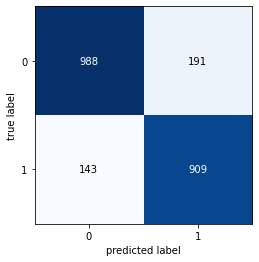

In [100]:
warnings.filterwarnings('ignore')
xgb = XGBClassifier()
xgb.fit(X, Y_train)

pred_tr_3 = xgb.predict(X)
pred_3 = xgb.predict(x)
conf_matrix = confusion_matrix(y_test,pred_3)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,pred_3,average='weighted')
recall = recall_score(y_test, pred_3,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(Y_train, pred_tr_3)))
print("Precision = "+str(precision_score(Y_train,pred_tr_3,average='weighted')))
print("Recall = "+str(recall_score(Y_train,pred_tr_3,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, pred_3)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

#### Comparing performance of different models

- Random forest classifier gives 0.85 accuracy score and 0.85 precision score.
- SVM classifier gives 0.72 accuracy score and 0.74 precision score.
- XGBoost classifier gives 0.85 accuracy score and 0.85 precision score.


#### XGBoost classifier and rfc classifier both gives accuracy score of 0.85.

In [101]:
import joblib

joblib.dump(rfc,'rfc_model.pkl')
joblib.dump(xgb,'xgb_model.pkl')

['xgb_model.pkl']

In [102]:
model = joblib.load('xgb_model.pkl')